In [3]:
import pandas as pd

data = {
    't': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34],
    'Y(t)': [
          100,
          142.77,
          124.92,
          115.21,
          113.21,
          110.01,
          105.08,
          100.8,
          104.57,
          105.29,
          103.03,
          100.5,
          101.81,
          103.03,
          101,
          143.81,
          123.27,
          116,
          107.3,
          105.6,
          103.9,
          103.94,
          105.4,
          104.2,
          105.4,
          107.1,
          105.3,
          101.1,
          104.1,
          105.5,
          103.4,
          101.2,
          104.26,
          105.2,
],
}
data_frame = pd.DataFrame(data)
data_frame

,t,Y(t)
0,1,100.00
1,2,142.77
2,3,124.92
3,4,115.21
4,5,113.21
5,6,110.01
6,7,105.08
7,8,100.80
8,9,104.57
9,10,105.29


## Сглаживание временных рядов

Сглаживание временного ряда, т.е. замена фактических уровней расчетными
значениями, имеющими меньшую колеблемость, чем исходные данные,
является простым методом выявления тенденции развития

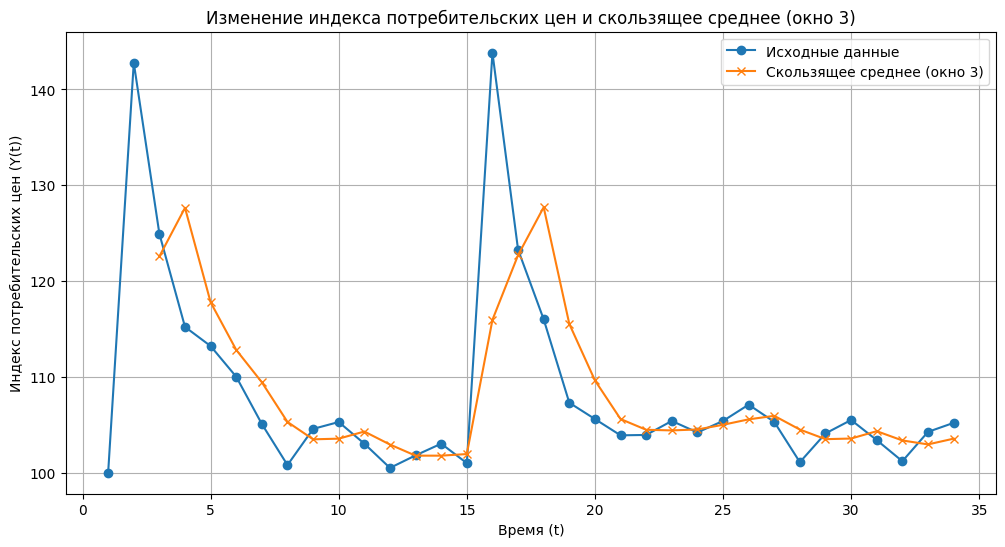

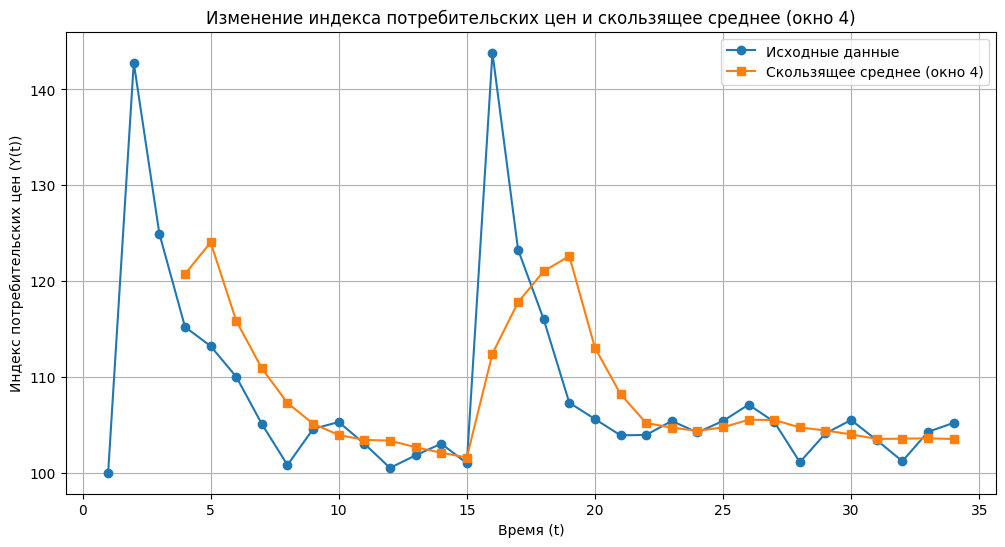

(0            NaN
 1            NaN
 2     122.563333
 3     127.633333
 4     117.780000
 5     112.810000
 6     109.433333
 7     105.296667
 8     103.483333
 9     103.553333
 10    104.296667
 11    102.940000
 12    101.780000
 13    101.780000
 14    101.946667
 15    115.946667
 16    122.693333
 17    127.693333
 18    115.523333
 19    109.633333
 20    105.600000
 21    104.480000
 22    104.413333
 23    104.513333
 24    105.000000
 25    105.566667
 26    105.933333
 27    104.500000
 28    103.500000
 29    103.566667
 30    104.333333
 31    103.366667
 32    102.953333
 33    103.553333
 Name: SMA_3, dtype: float64,
 0          NaN
 1          NaN
 2          NaN
 3     120.7250
 4     124.0275
 5     115.8375
 6     110.8775
 7     107.2750
 8     105.1150
 9     103.9350
 10    103.4225
 11    103.3475
 12    102.6575
 13    102.0925
 14    101.5850
 15    112.4125
 16    117.7775
 17    121.0200
 18    122.5950
 19    113.0425
 20    108.2000
 21    105.1850
 22   

In [7]:
import matplotlib.pyplot as plt

# Сдесь строим с помощью функции rolling значения скользящей средней
data_frame['SMA_3'] = data_frame['Y(t)'].rolling(window=3).mean()
data_frame['SMA_4'] = data_frame['Y(t)'].rolling(window=4).mean()

# строим два графика на основании полученных данных
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_3'], label='Скользящее среднее (окно 3)', marker='x')
plt.title('Изменение индекса потребительских цен и скользящее среднее (окно 3)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс потребительских цен (Y(t))')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_4'], label='Скользящее среднее (окно 4)', marker='s')
plt.title('Изменение индекса потребительских цен и скользящее среднее (окно 4)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс потребительских цен (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['SMA_3'],data_frame['SMA_4']

Если сравнить фактические объемы продаж с прогнозами, видно, что ни один
из методов прогнозирования не является достаточно точным.


Мерой сравнения является среднее абсолютных отклонений. Для
скользящего среднего за три месяца значение среднего абсолютных
отклонений равно 5,40; для скользящего среднего за четыре месяца значение
среднего абсолютных отклонений равно 5,55. Это значит, что использование
большого количества статистических данных скорее ухудшает, чем улучшает
точность прогноза методом скользящего среднего.


Значение прогноза, полученное методом простого скользящего среднего,
всегда меньше фактического значения, если исходные данные монотонно
возрастают, и больше фактического значения, если исходные данные
монотонно убывают.


Поэтому, если данные монотонно возрастают или убывают, то с помощью
простого скользящего среднего нельзя получить точных прогнозов. Этот
метод лучше всего подходит для данных с небольшими случайными
отклонениями от некоторого постоянного или медленно меняющегося
значения.

## Метод взвешенной скользящей средней

Идея, что более поздние данные важнее более старых, лежит в основе
метода взвешенной скользящей средней по n узлам.
Например, при n=3 взвешенное среднее вычисляется по формуле

image.png


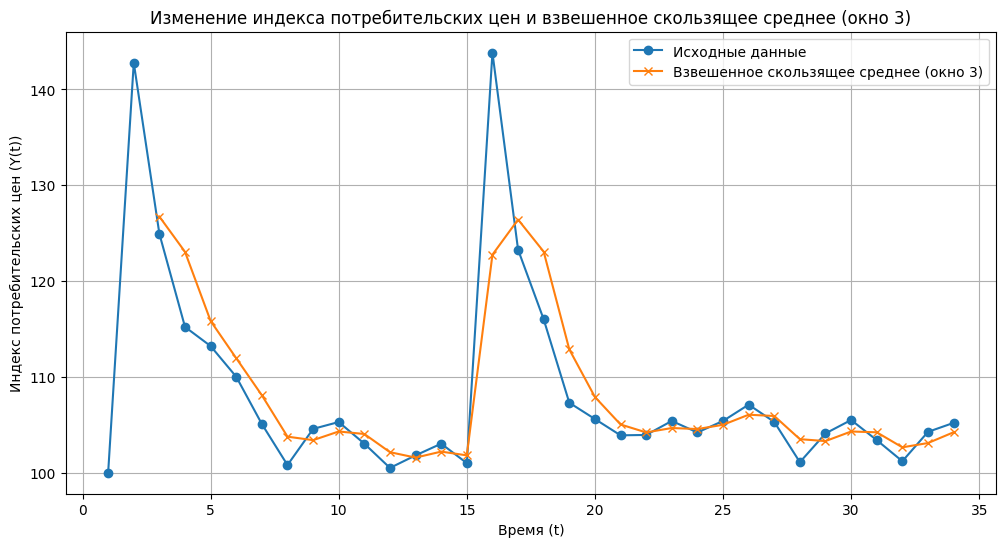

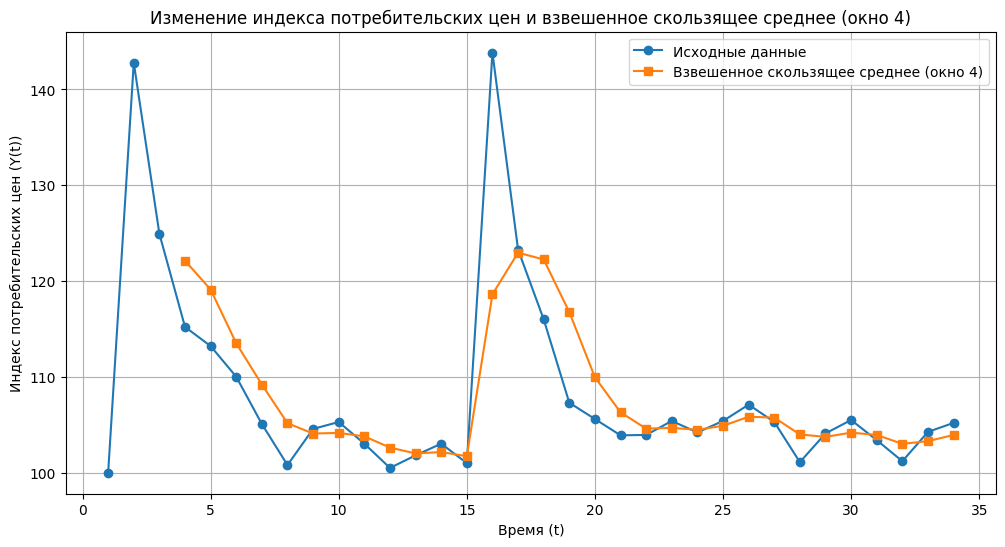

(0            NaN
 1            NaN
 2     126.716667
 3     123.040000
 4     115.828333
 5     111.943333
 6     108.078333
 7     103.761667
 8     103.398333
 9     104.301667
 10    104.040000
 11    102.141667
 12    101.576667
 13    102.201667
 14    101.811667
 15    122.743333
 16    126.405000
 17    123.058333
 18    112.861667
 19    107.900000
 20    105.033333
 21    104.203333
 22    104.663333
 23    104.556667
 24    105.000000
 25    106.050000
 26    105.916667
 27    103.500000
 28    103.300000
 29    104.300000
 30    104.216667
 31    102.650000
 32    103.096667
 33    104.220000
 Name: WMA_3, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3     122.114
 4     119.108
 5     113.501
 6     109.198
 7     105.167
 8     104.085
 9     104.155
 10    103.793
 11    102.624
 12    102.009
 13    102.158
 14    101.721
 15    118.611
 16    122.954
 17    122.243
 18    116.755
 19    109.957
 20    106.300
 21    104.596
 22    104.682
 23    104.47

In [8]:
import numpy as np

# Функция рассчета весов в зависимости от количества окон
def weighted_moving_average(data, window_size):
    """
    Calculate the Weighted Moving Average for a given window size.
    """
    weights = np.arange(1, window_size + 1)
    return data.rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Здесь сроятся значения взвешенной скользящей для 3 и 4 окон
data_frame['WMA_3'] = weighted_moving_average(data_frame['Y(t)'], 3)
data_frame['WMA_4'] = weighted_moving_average(data_frame['Y(t)'], 4)


# Построим графики на основе полученных данных
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_3'], label='Взвешенное скользящее среднее (окно 3)', marker='x')
plt.title('Изменение индекса потребительских цен и взвешенное скользящее среднее (окно 3)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс потребительских цен (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

# Graph for WMA with window size 4
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_4'], label='Взвешенное скользящее среднее (окно 4)', marker='s')
plt.title('Изменение индекса потребительских цен и взвешенное скользящее среднее (окно 4)')
plt.xlabel('Время (t)')
plt.ylabel('Индекс потребительских цен (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['WMA_3'], data_frame['WMA_4']

Полученные результаты показывают, что оптимальное распределение весов
таково, что вес сосредоточен на самом последнем наблюдении. При этом
значение среднего абсолютных отклонений равно 4,67. Этот результат
подтверждает предположение о том, что более поздние наблюдения должны
иметь больший вес.


## Метод экспоненциального сглаживания

Рассмотренные методы простой и взвешенной скользящей средней не дают
возможности сгладить первые и последние p наблюдений временного ряда.
Отсутствие сглаженных первых наблюдений не так важно по сравнению с
последними наблюдениями, особенно если целью исследования является
прогнозирование развития процесса. Есть методы, позволяющие получить
сглаженные значения последних уровней так же, как и всех остальных. К их
числу относится метод экспоненциального сглаживания.

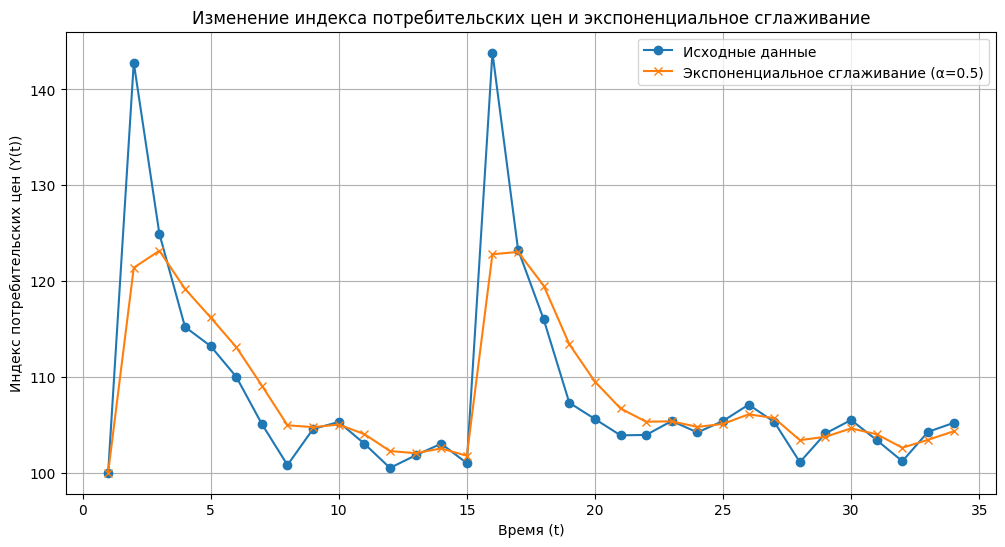

0     100.000000
1     121.385000
2     123.152500
3     119.181250
4     116.195625
5     113.102812
6     109.091406
7     104.945703
8     104.757852
9     105.023926
10    104.026963
11    102.263481
12    102.036741
13    102.533370
14    101.766685
15    122.788343
16    123.029171
17    119.514586
18    113.407293
19    109.503646
20    106.701823
21    105.320912
22    105.360456
23    104.780228
24    105.090114
25    106.095057
26    105.697528
27    103.398764
28    103.749382
29    104.624691
30    104.012346
31    102.606173
32    103.433086
33    104.316543
Name: EMA, dtype: float64

In [9]:
# Вычисляем значения экс. сглаживания с помощью функции ewm
data_frame['EMA'] = data_frame['Y(t)'].ewm(alpha=0.5, adjust=False).mean()

# строим график
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['EMA'], label='Экспоненциальное сглаживание (α=0.5)', marker='x')

plt.title('Изменение индекса потребительских цен и экспоненциальное сглаживание')
plt.xlabel('Время (t)')
plt.ylabel('Индекс потребительских цен (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

data_frame['EMA']